# Exploratory data analysis 1

## Project name: House prices: Advanced Regression Techniques.
The main aim of this project is to predict the house prices based on various features.

Life cycle of a data science project.
- Data Analysis
- Feauture engineering 
- Feture selection 
- Model building
- Model deployment

In [72]:
#Data analysis phase - Main aim to understand more data.
#import all libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [73]:
data_frame=pd.read_csv('train.csv')
data_frame.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
data_frame.shape
#this has 1460 rows and 81 columns(features)

(1460, 81)

In data analysis phase we handle,
- Missing data.
- All the numerical values. 
- Distribution of numerical variables.
- Categorical variables.
- Cardinatility of categorical variables.
- Outliers.
- Relationship between independent and dependent features.

# Missing values

In [75]:
#finding the percentage of missing values.
null_values_features=[]
for cols in data_frame.columns:
    total_null_values=data_frame[cols].isnull().sum()
    total_values=len(data_frame[cols])
    percentage=(total_null_values/total_values)*100
    if percentage>0:
        null_values_features.append(cols)
        print(cols,' has ',np.round(percentage,4),'% missing values')

LotFrontage  has  17.7397 % missing values
Alley  has  93.7671 % missing values
MasVnrType  has  0.5479 % missing values
MasVnrArea  has  0.5479 % missing values
BsmtQual  has  2.5342 % missing values
BsmtCond  has  2.5342 % missing values
BsmtExposure  has  2.6027 % missing values
BsmtFinType1  has  2.5342 % missing values
BsmtFinType2  has  2.6027 % missing values
Electrical  has  0.0685 % missing values
FireplaceQu  has  47.2603 % missing values
GarageType  has  5.5479 % missing values
GarageYrBlt  has  5.5479 % missing values
GarageFinish  has  5.5479 % missing values
GarageQual  has  5.5479 % missing values
GarageCond  has  5.5479 % missing values
PoolQC  has  99.5205 % missing values
Fence  has  80.7534 % missing values
MiscFeature  has  96.3014 % missing values


### Though the dataset has many missing values, we need to find the relationship between missing values and output feature(SalesPrice).

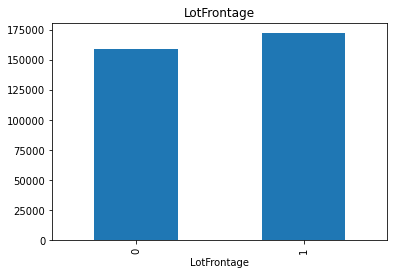

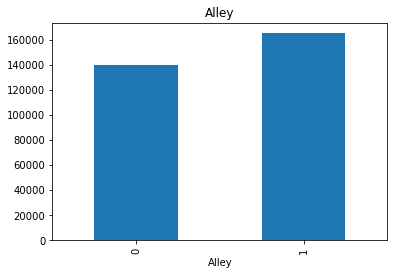

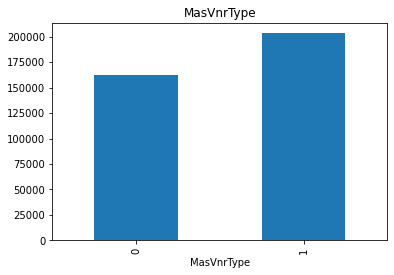

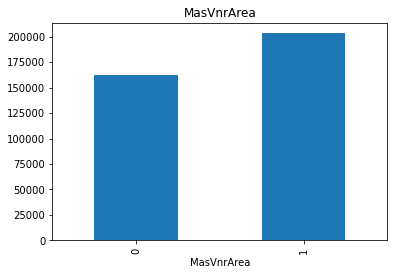

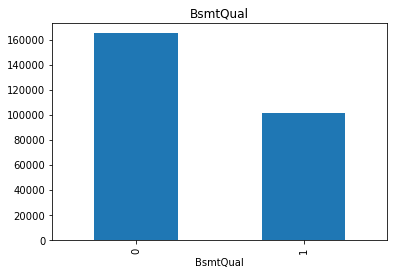

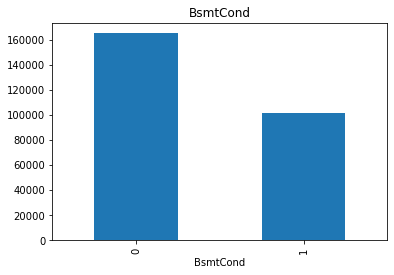

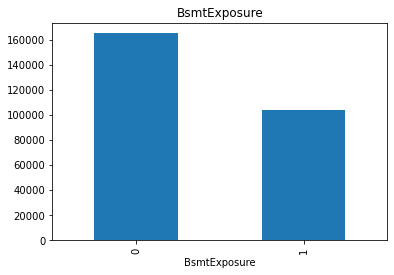

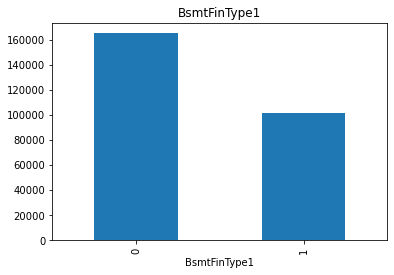

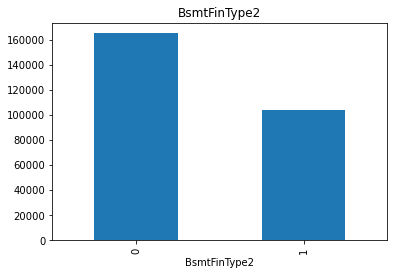

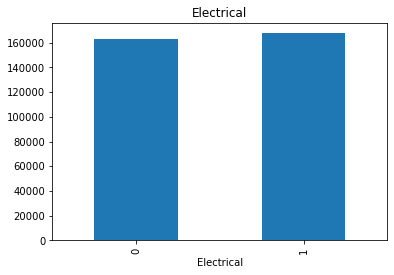

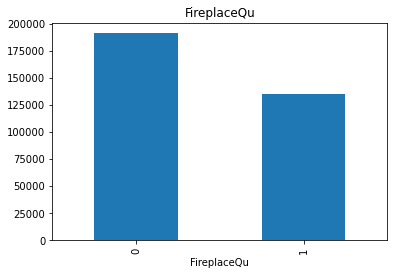

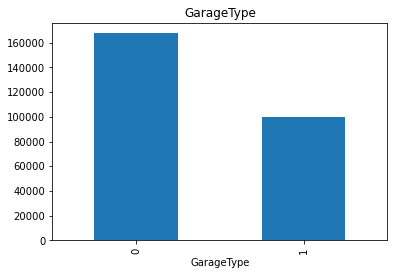

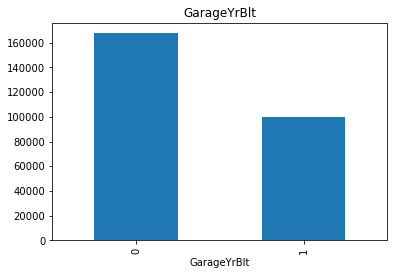

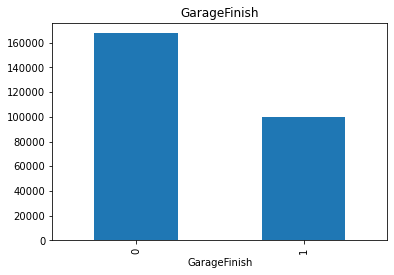

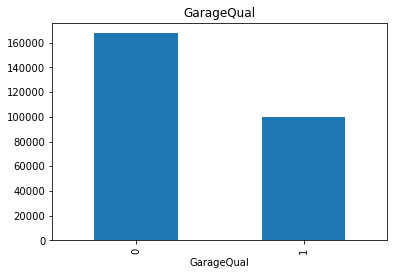

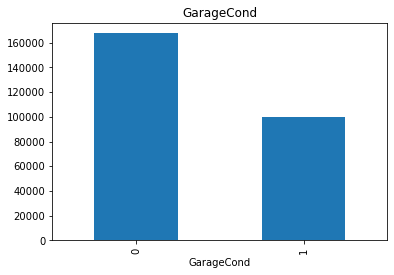

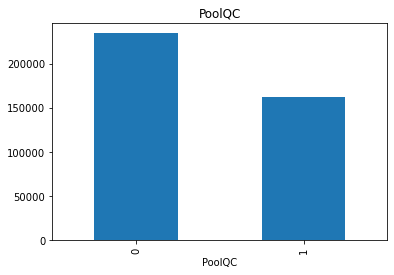

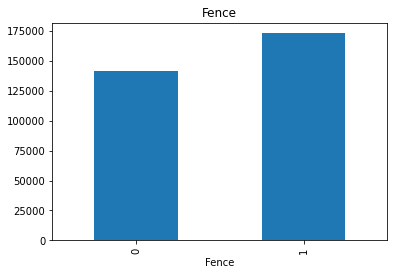

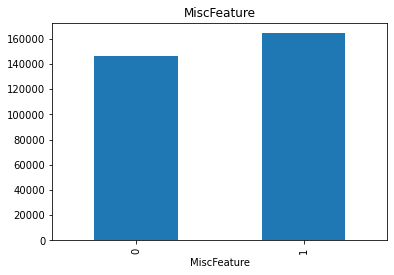

In [76]:
for cols in null_values_features:
    data=data_frame.copy()
    #replacing null values with 1 and not with 0.
    data[cols]=np.where(data[cols].isnull(),1,0)
    data.groupby(cols)['SalePrice'].median().plot.bar()
    plt.title(cols)
    plt.show()

Here the relation between the null value features and dependent variable is clerly visible. So, we need to replace those null values with some values in feature engineering process. 

In [77]:
#there is an unique feature in the dataframe. There is no use of that feature. 'Id' feature.

In [78]:
print('Length of values of Id column',len(data_frame['Id']))

Length of values of Id column 1460


## Numerical values

In [79]:
#getting the numerical values.
num_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype!='O':
        num_features.append(cols)

print('Number of numerical values: ',len(num_features))

Number of numerical values:  38


In [80]:
data_frame[num_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal variables(Eg: datatime variables)
In our dataset we have 4 temporal variables.

In [81]:
#identifying the temporal variables.
year_features=[]
for cols in num_features:
    if 'Year' in cols:
        year_features.append(cols)
    elif 'Yr' in cols:
        year_features.append(cols)

In [82]:
print('Temporal variables: ',year_features)

Temporal variables:  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [83]:
#unique values in temporal variables.
for cols in year_features:
    print(cols,'\n')
    print(data_frame[cols].unique())
    print('\n')

YearBuilt 

[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]


YearRemodAdd 

[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


GarageYrBlt 

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1

Text(0.5, 1.0, 'Relation between Year sold and sale price.')

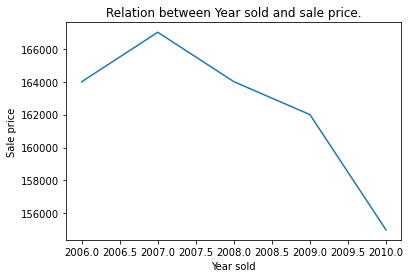

In [84]:
#plotting the 'YrSold' feature with salesprice.
data_frame.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year sold')
plt.ylabel('Sale price')
plt.title('Relation between Year sold and sale price.')

In [85]:
data_frame.groupby('YrSold')['SalePrice'].median()

YrSold
2006    163995
2007    167000
2008    164000
2009    162000
2010    155000
Name: SalePrice, dtype: int64

In [86]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

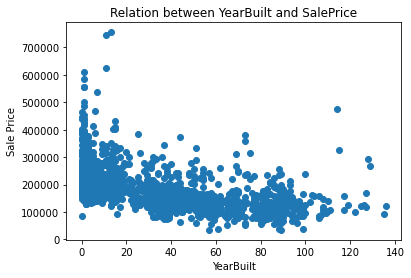

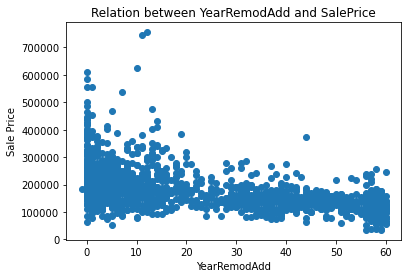

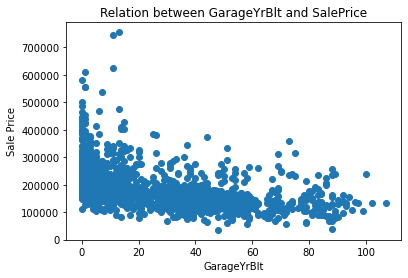

In [87]:
#comparing the differnce between all year features and saleprice.
for col in year_features:
    if col!='YrSold':
        data=data_frame.copy()
        data[col]=data['YrSold']-data[col]
        plt.scatter(data[col],data['SalePrice'])
        plt.xlabel(col)
        plt.ylabel('Sale Price')
        plt.title('Relation between '+col+' and SalePrice')
        plt.show()

In [88]:
#finding the categorical and continous variables.
discrete_features=[]
for cols in num_features:
    if cols!='Id':
        if cols not in year_features:
            if len(data_frame[cols].unique())<25:
                discrete_features.append(cols)

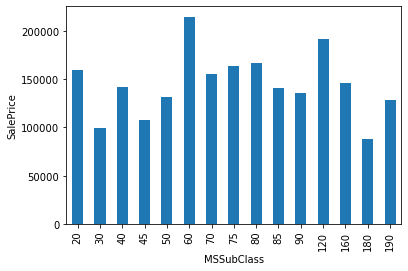

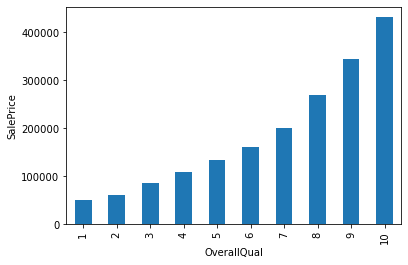

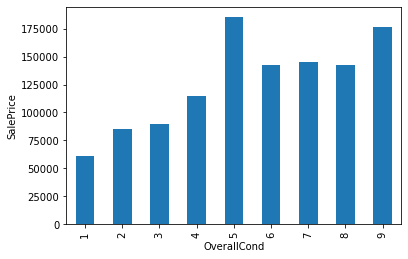

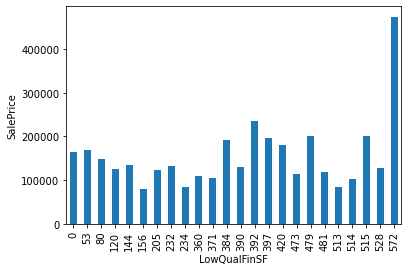

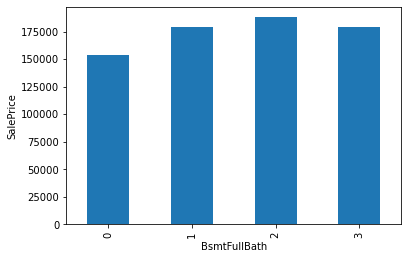

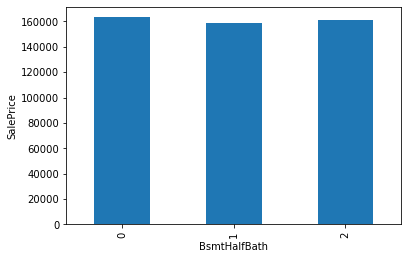

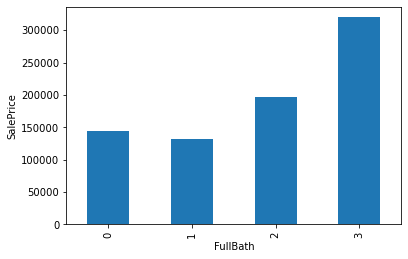

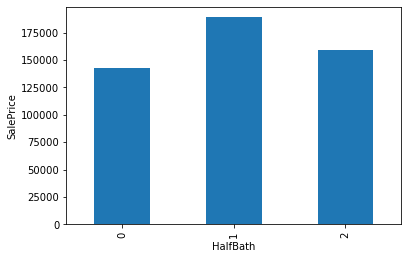

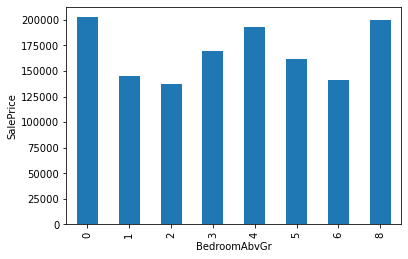

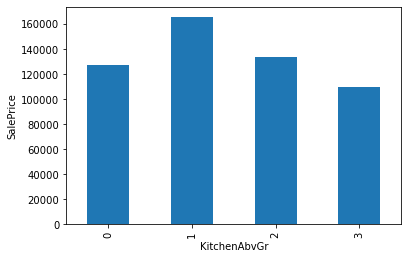

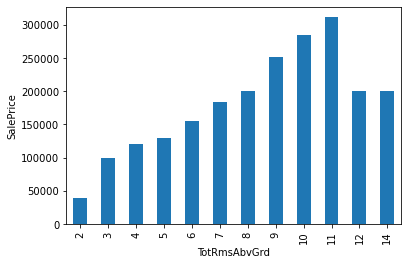

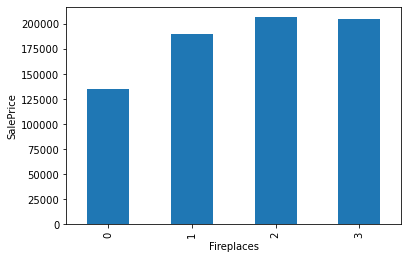

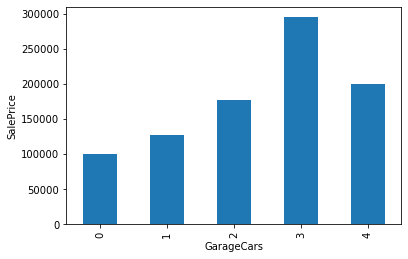

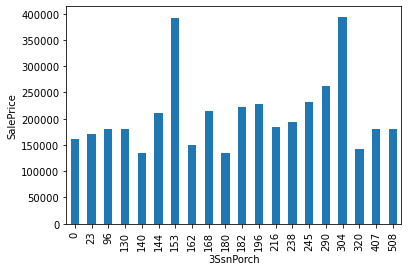

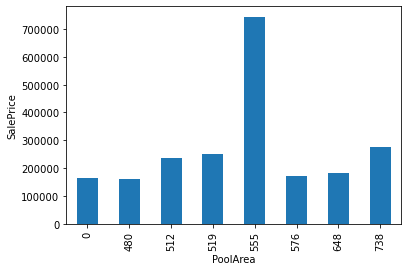

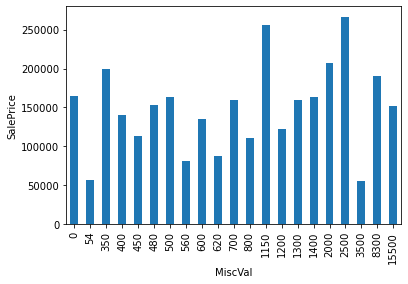

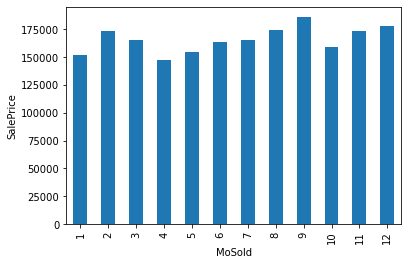

In [89]:
#let's find the relationship between the discrete features and saleprice.
for cols in discrete_features:
    data_frame.groupby(cols)['SalePrice'].median().plot.bar()
    plt.xlabel(cols)
    plt.ylabel('SalePrice')
    plt.show()

In [90]:
#so, there is a relationship between the discrete features and salesprice.

### Continous variables.

In [91]:
continous_features=[]
for cols in num_features:
    if cols not in year_features:
        if (len(data_frame[cols].unique())>=25):
            if (cols!='Id'):
                continous_features.append(cols)

print('Length of continous features: ',len(continous_features))

Length of continous features:  16


In [92]:
continous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

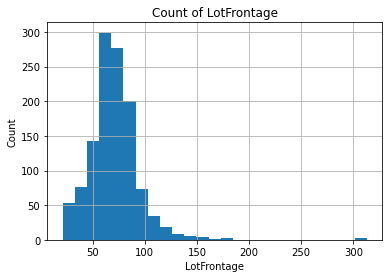

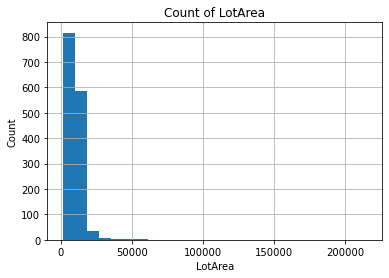

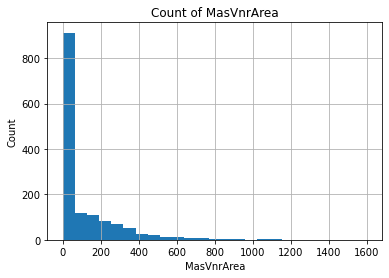

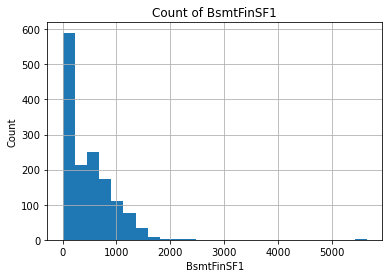

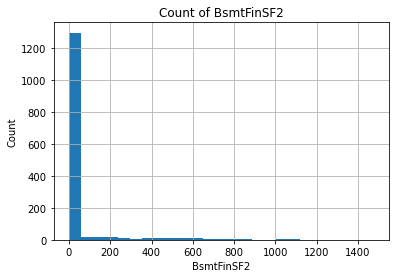

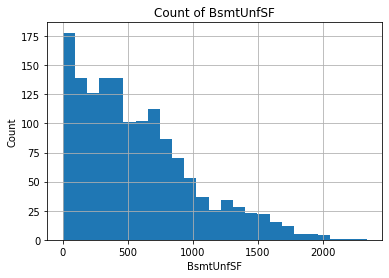

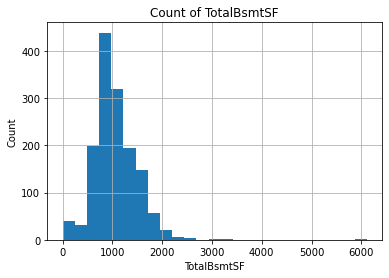

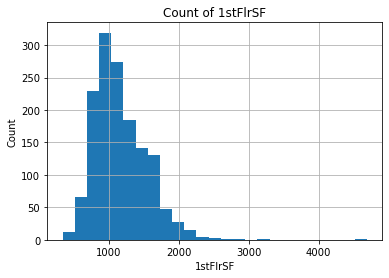

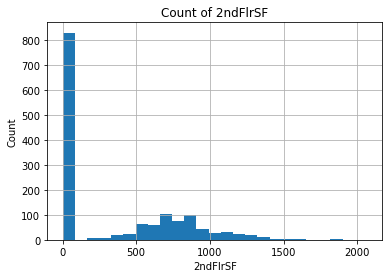

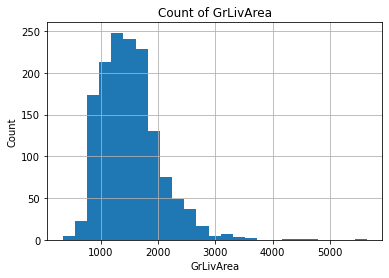

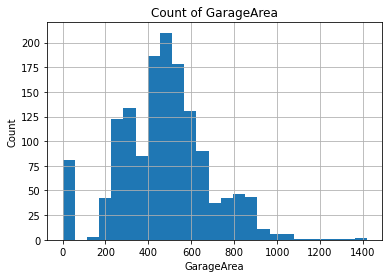

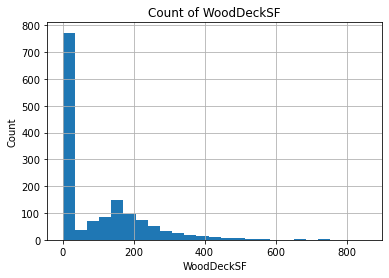

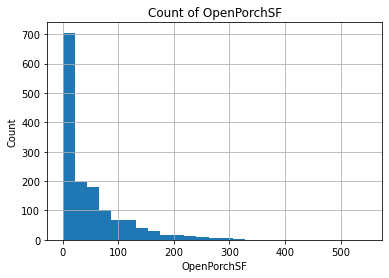

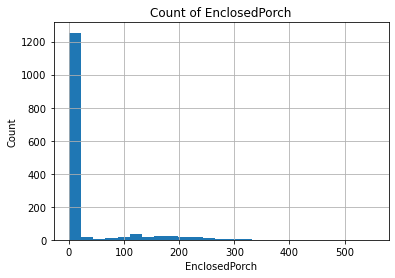

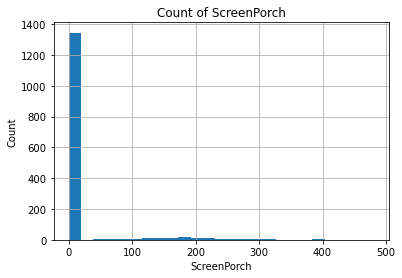

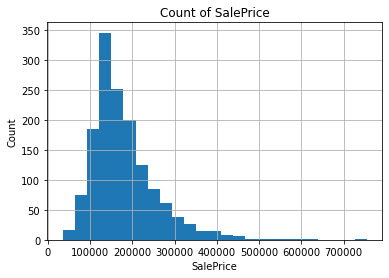

In [93]:
for feature in continous_features:
    data=data_frame.copy()
    data[feature].hist(bins=25)
    plt.title('Count of '+feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [94]:
#above histograms show that the features are not normally distributed and they are skewed.
#so we need to perform logarithmic transformation.

# Exploratory data analysis 2

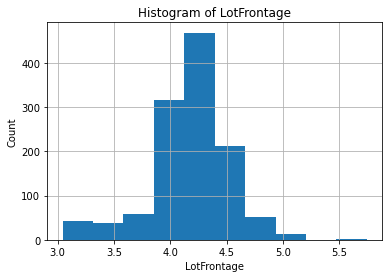

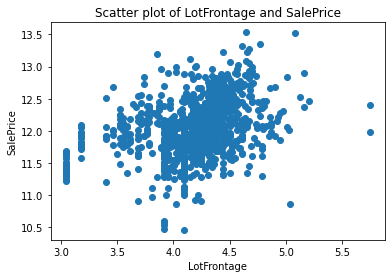

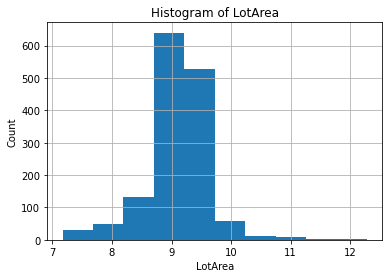

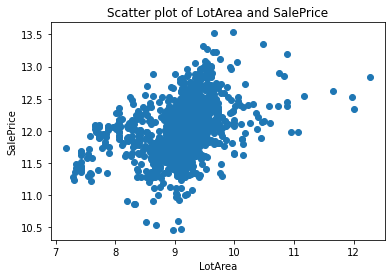

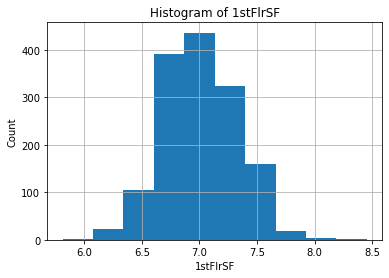

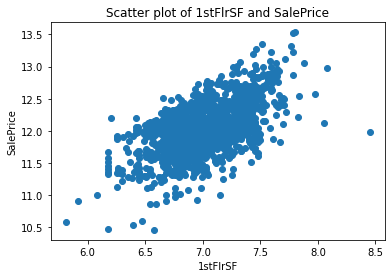

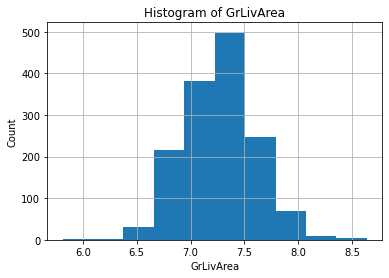

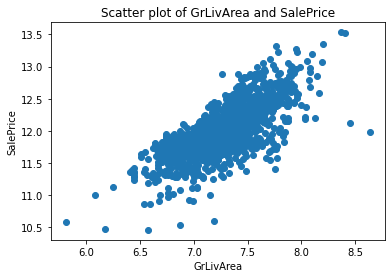

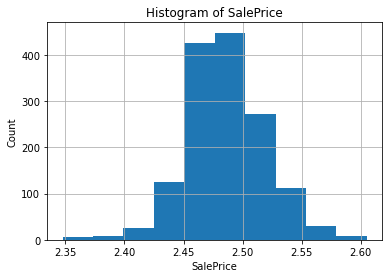

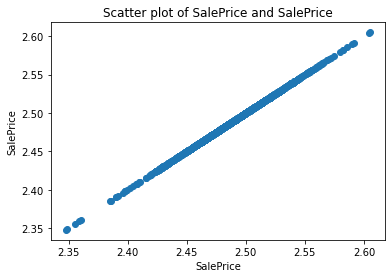

In [95]:
# using logarithimic transformation we transform the data which is skewed.
for cols in continous_features:
    data=data_frame.copy()
    if 0 in data[cols].unique():
        #we use this condition because calculating the log(0) is undefined. So, we skip the columns that includes 0.
        pass
    else:
        #here, we calculate the logarithmic of the data.
        data[cols]=np.log(data[cols])
        data['SalePrice']=np.log(data['SalePrice'])
        #plotting histogram of the transformed features.
        data[cols].hist()
        plt.title('Histogram of '+cols)
        plt.ylabel('Count')
        plt.xlabel(cols)
        plt.show()
        #plotting scatter plot.
        plt.scatter(data[cols],data['SalePrice'])
        plt.title('Scatter plot of '+cols+' and SalePrice')
        plt.xlabel(cols)
        plt.ylabel('SalePrice')
        plt.show()

In [96]:
# The data is normally distributed.

### Outliers

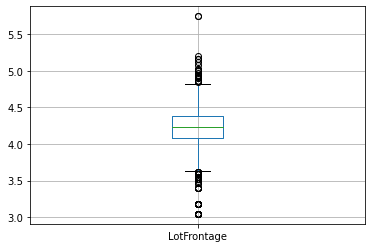

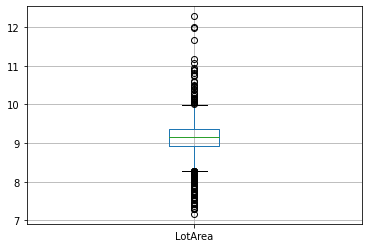

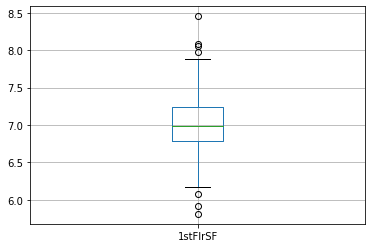

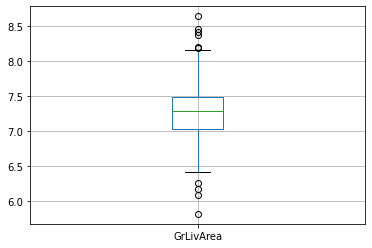

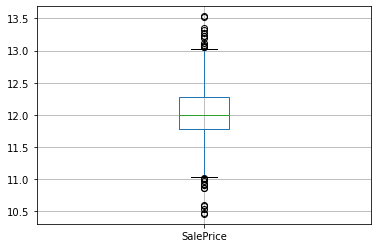

In [98]:
#finding the outliers in the data.
for feature in continous_features:
    data=data_frame.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.show()

In [ ]:
#so, use boxplot to find the outliers for continous data.

### Categorical features

In [103]:
#getting the categorical features.
categorical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)

In [104]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [106]:
#dataframe of categorical features.
data_frame[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [112]:
#find the cardinality values(knowing how many categories are present in categorical features.)
for cols in categorical_features:
    print('The feature ',cols,' is having ',len(data_frame[cols].unique()),' categories')

The feature  MSZoning  is having  5  categories
The feature  Street  is having  2  categories
The feature  Alley  is having  3  categories
The feature  LotShape  is having  4  categories
The feature  LandContour  is having  4  categories
The feature  Utilities  is having  2  categories
The feature  LotConfig  is having  5  categories
The feature  LandSlope  is having  3  categories
The feature  Neighborhood  is having  25  categories
The feature  Condition1  is having  9  categories
The feature  Condition2  is having  8  categories
The feature  BldgType  is having  5  categories
The feature  HouseStyle  is having  8  categories
The feature  RoofStyle  is having  6  categories
The feature  RoofMatl  is having  8  categories
The feature  Exterior1st  is having  15  categories
The feature  Exterior2nd  is having  16  categories
The feature  MasVnrType  is having  5  categories
The feature  ExterQual  is having  4  categories
The feature  ExterCond  is having  5  categories
The feature  Fo

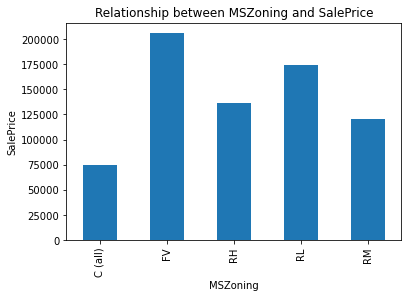

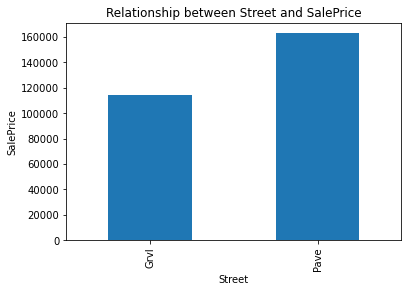

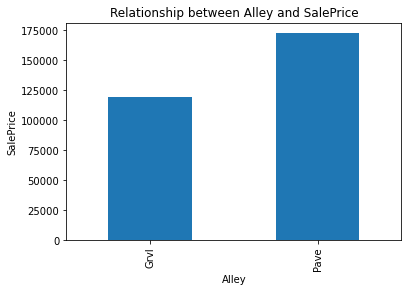

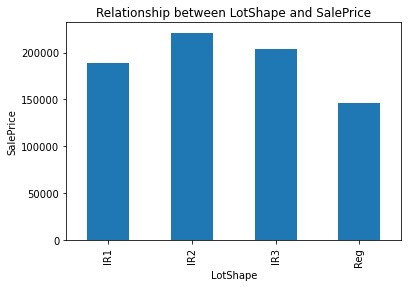

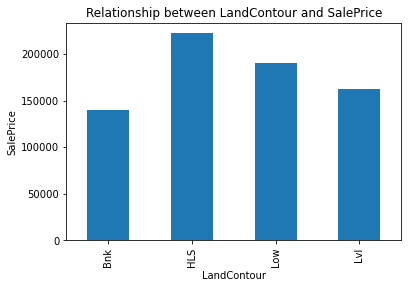

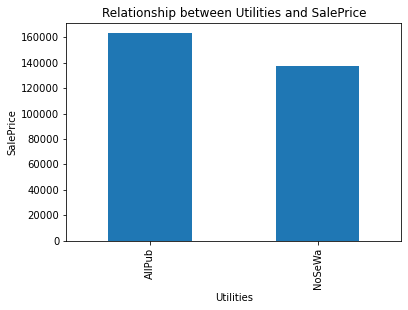

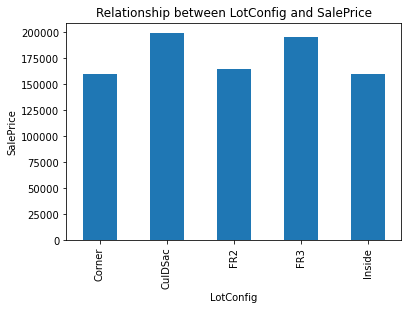

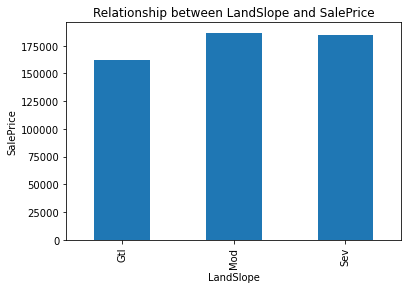

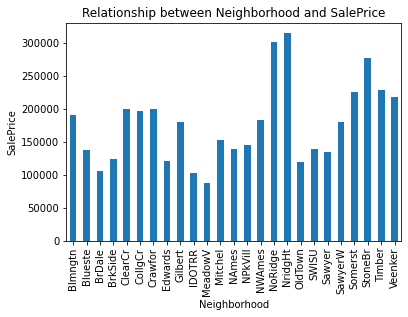

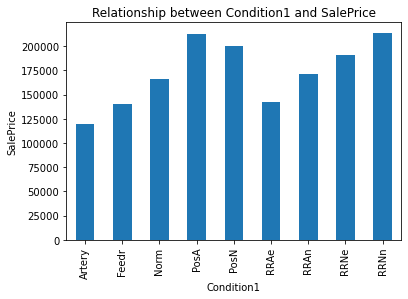

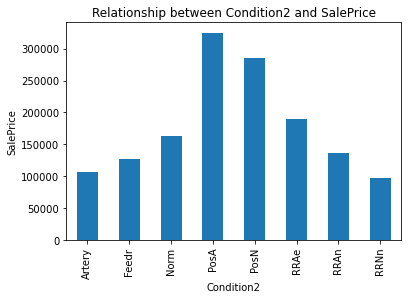

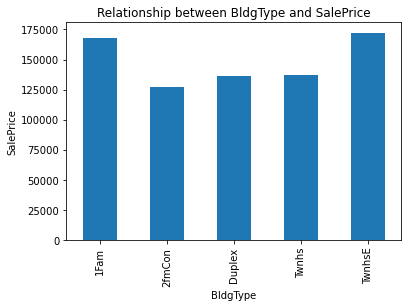

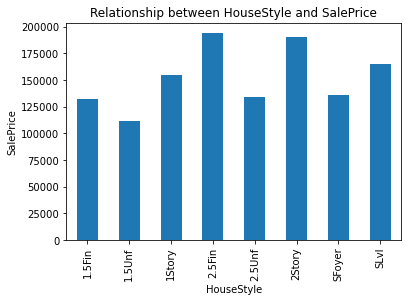

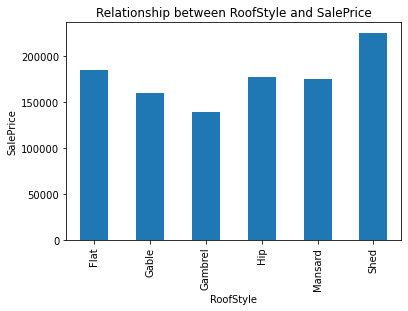

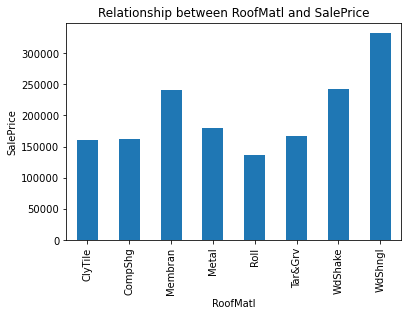

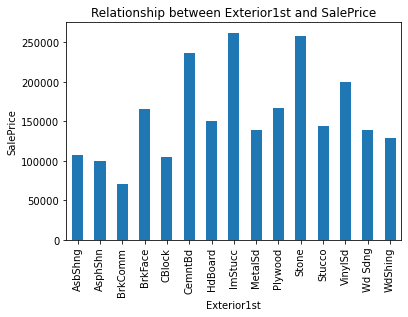

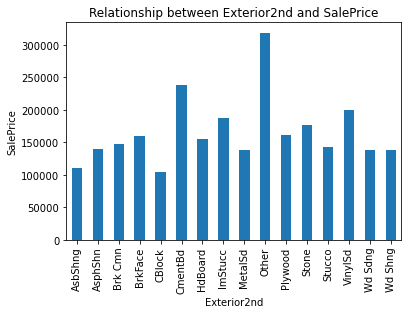

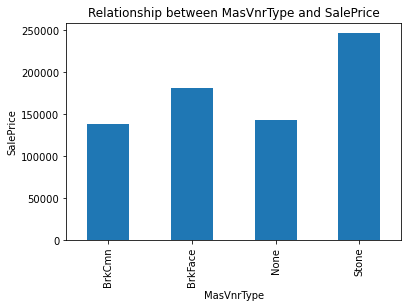

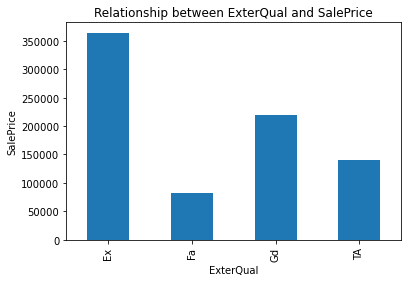

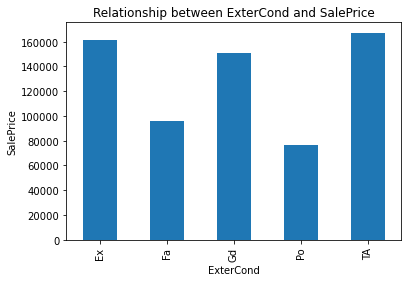

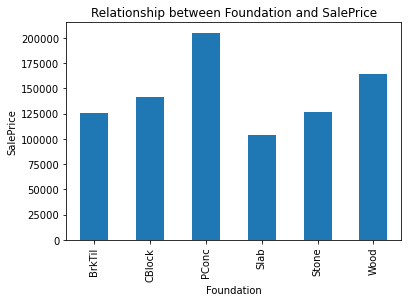

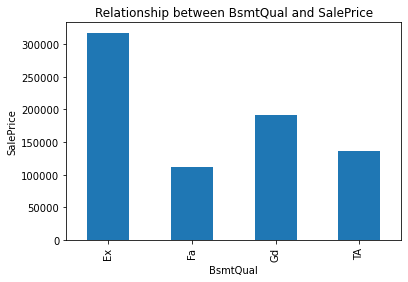

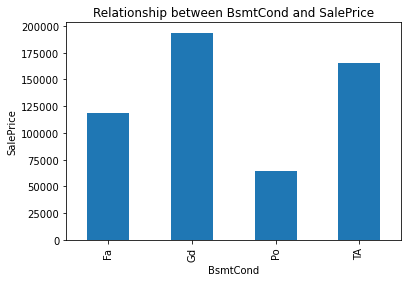

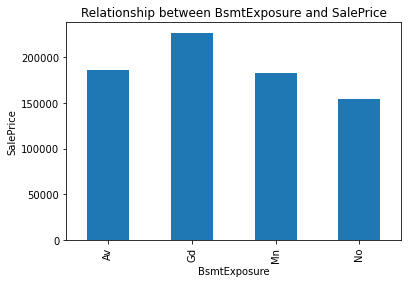

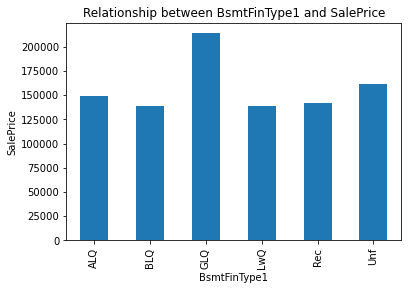

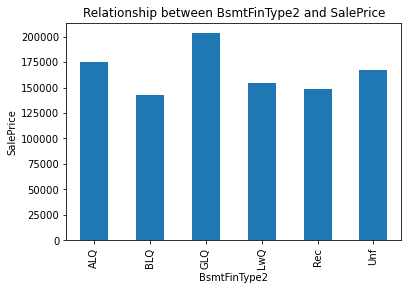

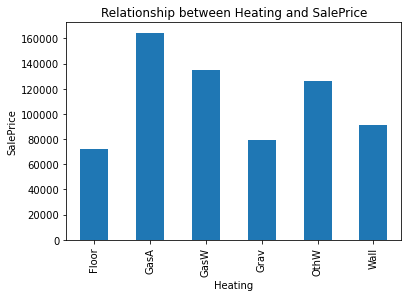

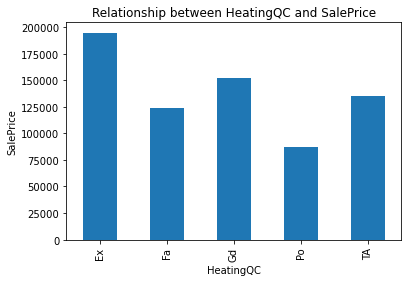

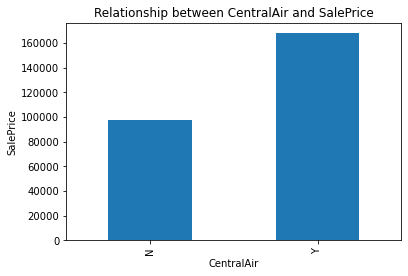

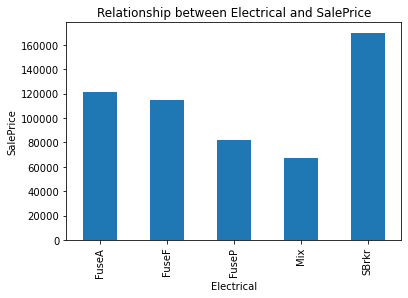

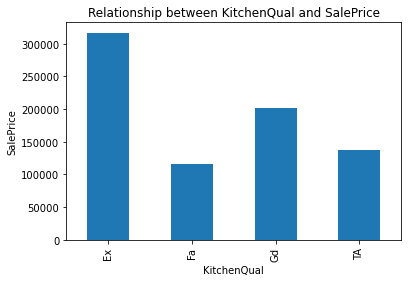

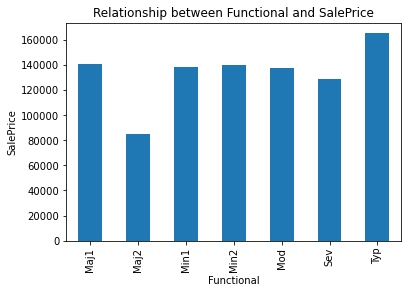

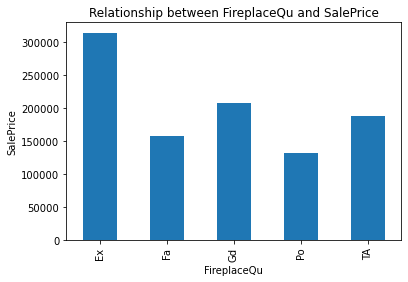

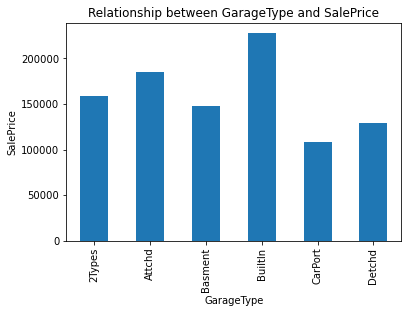

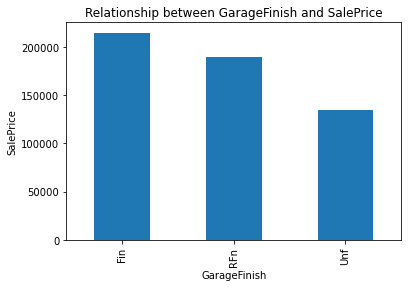

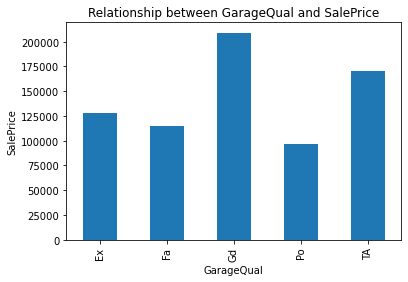

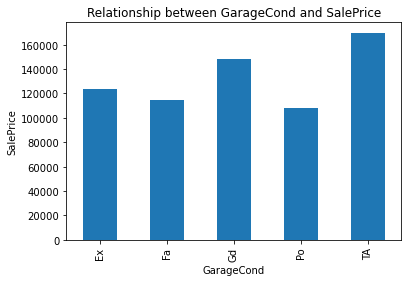

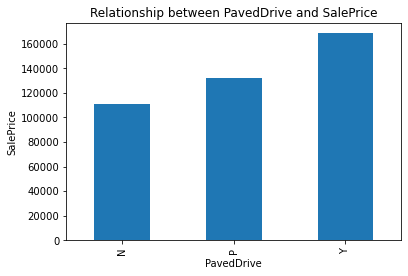

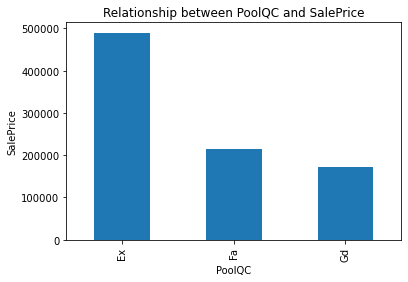

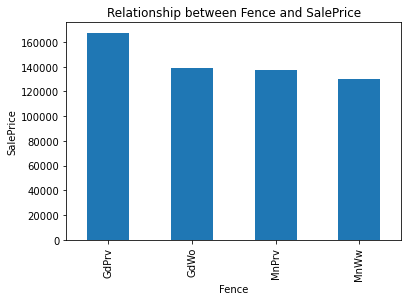

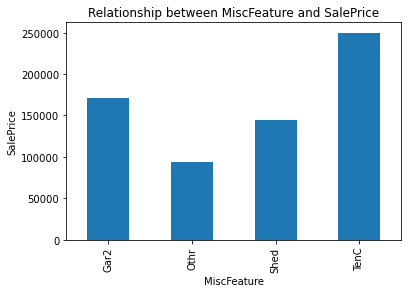

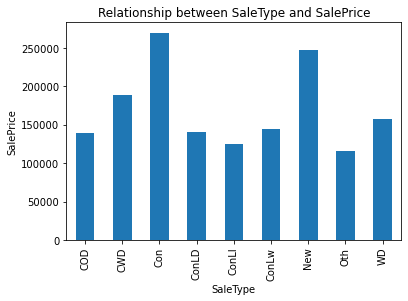

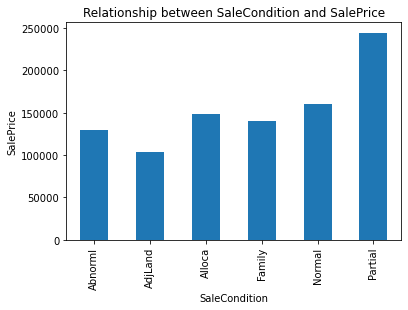

In [115]:
#finding the relationship between the categorical features and dependent feature.
for cols in categorical_features:
    data=data_frame.copy()
    data.groupby(cols)['SalePrice'].median().plot.bar()
    plt.title('Relationship between '+cols+' and SalePrice')
    plt.xlabel(cols)
    plt.ylabel('SalePrice')
    plt.show()